# ❓ <font color='green'> <u> PROBLEM STATEMENT (Zoo_Animal_Classification) </u>

## 🔵 <font color='blue'>Implement a KNN model to classify the animals into categories.

___

## ⚫ <u>Introduction:
+ ###  <font color='candy'><u> K - Nearest Neighbour (KNN) </u></font> algorithm is a <u>supervised machine learning</u> algorithm that uses proximity to classify or predict the grouping of a data point. The algorithm can be used to solve both <u>classification and regression</u> problem statements. 
    
+ ### The KNN algorithm creates an imaginary boundary to classify the data. When new data points come in, the algorithm will try to predict that to the nearest of the boundary line and put the new case into the category that is most similar to the available categories.
    
+ ### KNN also called as "lazy learner" because it doesn't learn from the training data immediately. Instead, it stores the dataset and performs an action on it at the time of classification.

+ ### The best choice of k depends upon the data. Generally, larger values of k reduces effect of the noise on the classification, but make boundaries between classes less distinct. So we will select such K value where where both training and testing accuracy are same.

+ ### Distance metrics for KNN include: Euclidean Distance, Manhattan, Minkowski, Hamming Distances.


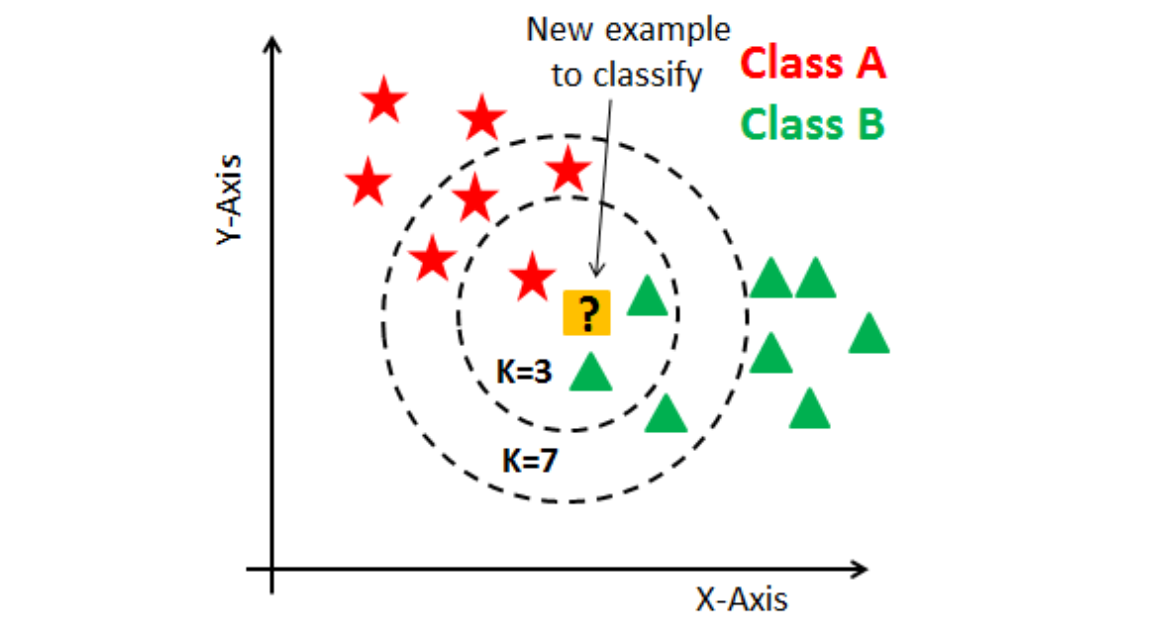

___

* ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
sns.set_theme(style= 'darkgrid', palette= 'pastel')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

___

* ### <font color = 'blue'> <u> READ DATA </u>

In [1]:
df = pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Datasets_Assignments/main/Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


___

* ### <font color = 'blue'> <u> PERFORM EDA </u>

* ##### <font color ='green'> <u>Data Summary</u>

In [2]:
df.shape

(101, 18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


* ##### <font color ='green'> <u>Descriptive statistics</u>

In [4]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
df.nunique()

animal name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
type             7
dtype: int64

In [6]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
df.duplicated().sum()

0

#####  Variable "animal name" have  100 unique values so it was not much important for our further analysis so we neglect it.

In [8]:
df.drop(columns = "animal name", inplace = True)
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


> * #### There are 101 records and 18 Variables.
> * #### All variables are of proper data type.
> * #### "type" is target column.
> * #### No null value observed.
> * #### There is no duplicated record.

___

* ### <font color = 'blue'> <u> DATA VISUALISATION </u>

<Axes: >

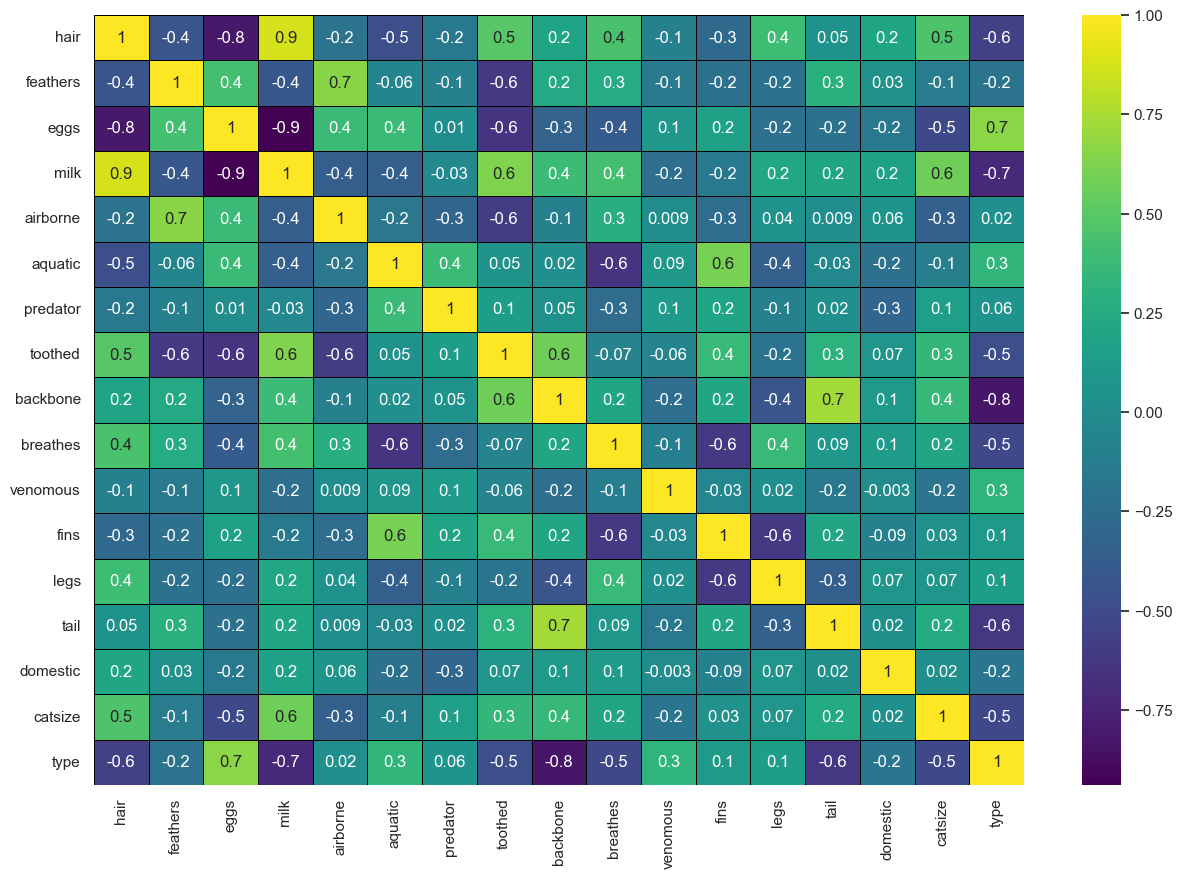

In [9]:
# Correation between Numerical variables:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", linewidths=0.5, linecolor='black')

<Axes: ylabel='type'>

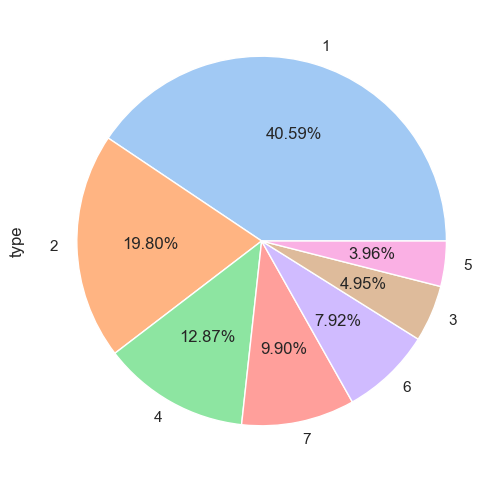

In [10]:
# Plottig Target Variable:
plt.figure(figsize = (8,6))
df['type'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')

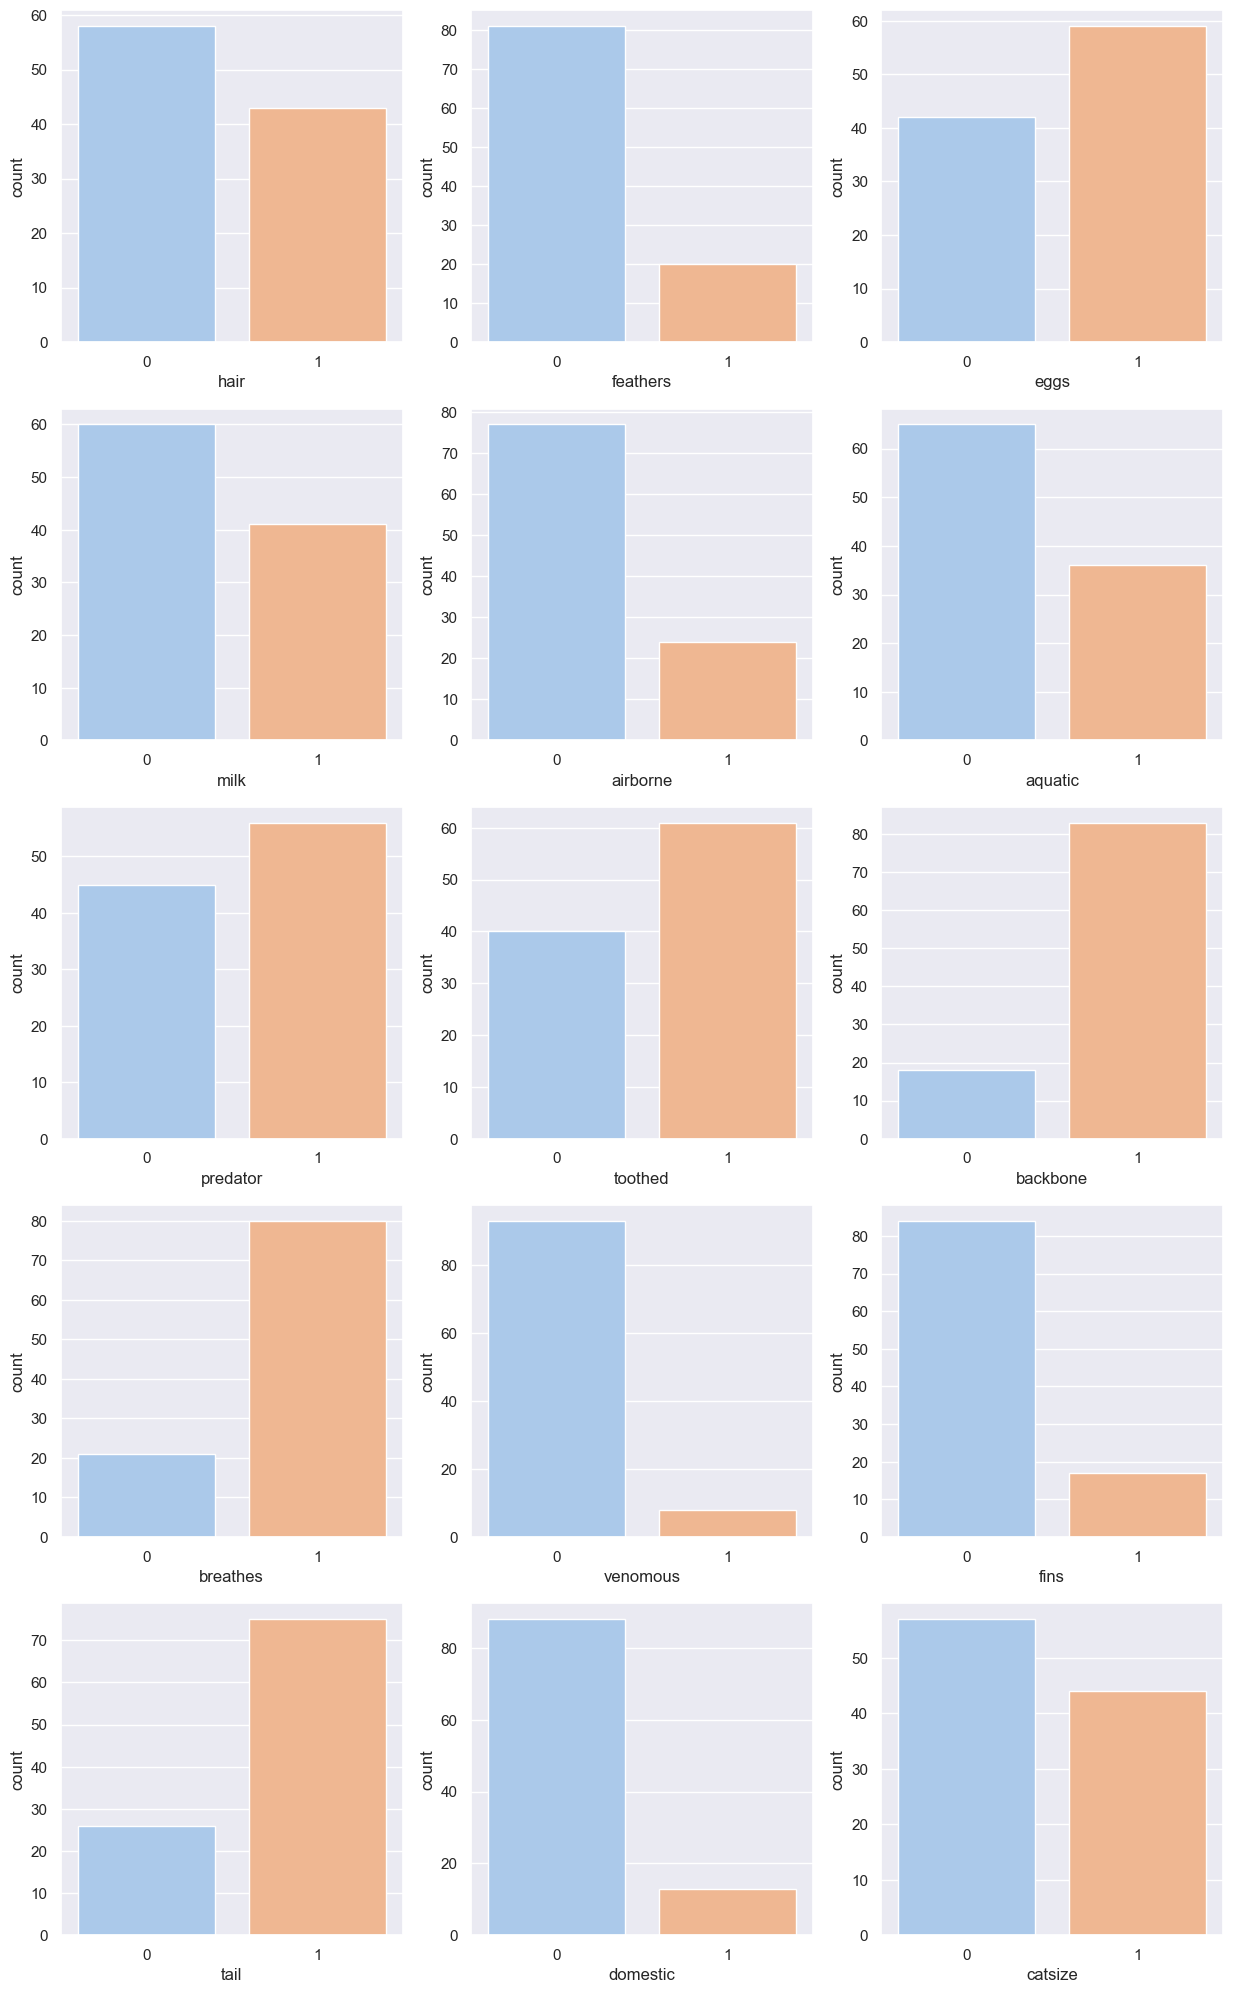

In [11]:
# Barplot for Categorical Variables:
fig, ax =plt.subplots(5,3, figsize=(15,25)) 

sns.countplot(x = df["hair"], ax= ax[0,0])
sns.countplot(x = df["feathers"], ax=ax[0,1])
sns.countplot(x = df["eggs"], ax= ax[0,2])

sns.countplot(x = df["milk"], ax= ax[1,0])
sns.countplot(x = df["airborne"], ax= ax[1,1])
sns.countplot(x =df["aquatic"], ax= ax[1,2])

sns.countplot(x = df["predator"], ax= ax[2,0])
sns.countplot(x = df["toothed"], ax= ax[2,1])
sns.countplot(x = df["backbone"], ax= ax[2,2])

sns.countplot(x = df["breathes"], ax= ax[3,0])
sns.countplot(x = df["venomous"], ax= ax[3,1])
sns.countplot(x = df["fins"], ax= ax[3,2])

sns.countplot(x = df["tail"], ax= ax[4,0])
sns.countplot(x = df["domestic"], ax= ax[4,1])
sns.countplot(x = df["catsize"], ax= ax[4,2]);

> * #### Variables having high positive correlation: "hair" and "milk", "feathers" and "airborne", "backbone" and "tail", "eggs" with "type"
> * #### Variables having high negative correlation: "type" and "milk", "type" and "backbone", "hair and "eggs", "milk" and "eggs".
> * #### In target variable "type" have 7 different categories and majority data points 40.59% belongs to type 1 category.
> * #### All other independent variables are only have 'yes' and 'no' categories, we can see their distribution in barplot.

___

* ### <font color = 'blue'> <u> DATA PREPROCESSING  </u>

In [12]:
x = df.iloc[:,:-1]
y = df['type']

### <font color = "green">➡ Standardisation:

In [13]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

### <font color = "green">➡ Train Test Split 

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.25, random_state= 42)

In [15]:
print("Shape of x_train: ",xtrain.shape)
print("Shape of x_test: ", xtest.shape)
print("Shape of y_train: ",ytrain.shape)
print("Shape of y_test",ytest.shape)

Shape of x_train:  (75, 16)
Shape of x_test:  (26, 16)
Shape of y_train:  (75,)
Shape of y_test (26,)


___

* ### <font color = 'blue'> <u> MODEL BUILDING & EVALUATION</u>

In [16]:
kn = KNeighborsClassifier() # Default neighbors: n_neighbors = 5
kn.fit(xtrain, ytrain)
ypred = kn.predict(xtest)

In [17]:
# Classification Report:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2

    accuracy                           0.92        26
   macro avg       0.81      0.79      0.78        26
weighted avg       0.94      0.92      0.92        26



In [18]:
print(f"Accuracy Score: {accuracy_score(ytest, ypred) * 100:.2f}%")

Accuracy Score: 92.31%


In [19]:
print(f'Tranning Score: {kn.score(xtrain,ytrain)}')
print(f'Testing Score:{kn.score(xtest,ytest)}')

Tranning Score: 0.9466666666666667
Testing Score:0.9230769230769231


> * #### For both training and testing accuracy is good and there is 2% difference in them. We can say with K = 5 model performs very well.
> * #### Let's see the accuracies for different number of K by plotting it.

___

* ### <font color = 'blue'> <u> Choosing Optimum Number for K </u>

In [20]:
training_ac = []
testing_ac = []
for i in range(1,30):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(xtrain,ytrain)
    training_ac.append(kn.score(xtrain,ytrain))
    testing_ac.append(kn.score(xtest,ytest))

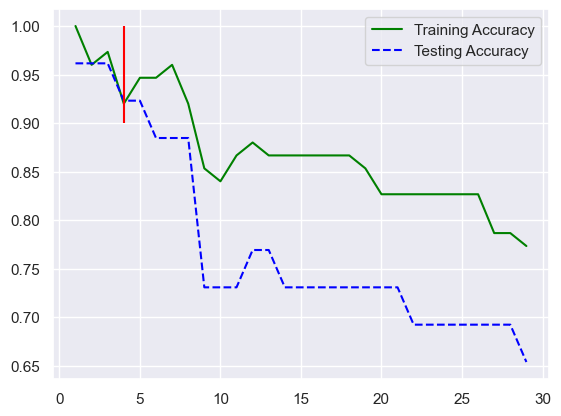

In [21]:
plt.plot(range(1,30), training_ac, linestyle = "-", label = "Training Accuracy", color = "green")
plt.plot(range(1,30), testing_ac, linestyle = "--", label = "Testing Accuracy", color = "blue")
plt.vlines( x = 4 ,ymin = 0.9, ymax = 1.0, color = 'red')
plt.legend()

In [22]:
kn = KNeighborsClassifier(n_neighbors = 4) # Default neighbors: n_neighbors = 5
kn.fit(xtrain, ytrain)
ypred = kn.predict(xtest)

In [23]:
# Classification Report:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2

    accuracy                           0.92        26
   macro avg       0.81      0.79      0.78        26
weighted avg       0.94      0.92      0.92        26



In [24]:
print(f"Accuracy Score: {accuracy_score(ytest, ypred) * 100:.2f}%")

Accuracy Score: 92.31%


In [25]:
print(f'Tranning Score: {kn.score(xtrain,ytrain)}')
print(f'Testing Score:{kn.score(xtest,ytest)}')

Tranning Score: 0.92
Testing Score:0.9230769230769231


* ### <font color = 'blue'> <u> CONCLUSION </u>
    
> * #### With default K (number of clusters) = 5, we get 94% Training and 92% Testing Accuracy which are good for model building.
> * #### With K = 4 we get both training and testing accuracies same i.e. 92%.
> * #### We can conclude that KNN works good for small datasets as it is computationally costly.

<br>
<br>
<br>

> # <font color = 'magenta'><u>END</u>
___